<a href="https://colab.research.google.com/github/tanishpophale53/Employee-Attrition-analysis-using-Machine-Learning/blob/main/APRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EMPLOYEE ATTRITION ANALYSIS MODEL OF TOP IT COMPANIES**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np    #Importing necessary libraries and packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
plt.style.use('dark_background') #Plot dark mode 

In [ ]:
#df = pd.read_excel('/content/drive/MyDrive/Employee_attrition_dataset  (1).xlsx')  #Reading dataset using pandas
df = pd.read_excel('/content/drive/MyDrive/AP.xlsx') #Reading dataset using pandas

In [ ]:
df.head()    #printing first 5 data entries 

,Sr. No,Company name,Company type,Employee ID,Attrition,Employee Age,YearsAtCompany,Gender,location,Employee Department,...,Review,Career growth,Job security,Work life balance,Skill Development,Company culture,Work Satisfaction,Salary and benefits,OverTime,Work timing satisfaction
0,1.0,Accenture,Product based,1001.0,Yes,25.0,2.0,Female,Mumbai,Information Technology,...,good company if you want to learn and grow . s...,4.0,4.0,4.0,4.0,4.0,4.0,1.0,Yes,Strict
1,2.0,Accenture,Product based,1002.0,No,56.0,4.0,Female,Pune,Information Technology,...,"Very interesting, cool life, No stress while w...",5.0,5.0,5.0,4.0,5.0,4.0,2.0,No,Flexible
2,3.0,Accenture,Product based,1003.0,Yes,24.0,1.0,Male,Mumbai,Database Administration,...,"it was very great working with Accenture , qui...",3.0,3.0,3.0,2.0,3.0,2.0,3.0,Yes,Strict
3,4.0,Accenture,Product based,1004.0,No,23.0,8.0,Female,Pune,Finance Sector,...,"No good culture , only bad politics.",1.0,1.0,1.0,2.0,2.0,1.0,1.0,Yes,Strict
4,5.0,Accenture,Product based,1005.0,No,27.0,2.0,Female,Mumbai,Finance Sector,...,Competitive and inNovative workspace.good envi...,NaN,2.0,1.0,1.0,1.0,2.0,2.0,No,Strict


In [ ]:
df.shape  #Dimensions of the dataset

(650, 21)

In [ ]:
df.dtypes     #checking datatypes of each column 

Sr. No                      float64
Company name                 object
Company type                 object
Employee ID                 float64
Attrition                    object
Employee Age                float64
YearsAtCompany              float64
Gender                       object
location                     object
Employee Department          object
Job Role                     object
Review                       object
Career growth               float64
Job security                float64
Work life balance           float64
Skill Development           float64
Company culture             float64
Work Satisfaction           float64
Salary and benefits         float64
OverTime                     object
Work timing satisfaction     object
dtype: object

In [ ]:
df.describe()

,Sr. No,Employee ID,Employee Age,YearsAtCompany,Career growth,Job security,Work life balance,Skill Development,Company culture,Work Satisfaction,Salary and benefits
count,650.00000,650.000000,650.000000,650.000000,648.000000,648.000000,647.000000,648.000000,649.000000,649.000000,649.000000
mean,325.50000,1319.598462,34.563077,3.816923,3.057099,3.520062,3.296754,3.304012,3.372881,2.949153,2.996918
std,187.78312,186.188252,7.951114,3.047446,1.386002,1.401996,1.415867,1.308107,1.364091,1.399582,1.347147
min,1.00000,1001.000000,21.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,163.25000,1156.250000,28.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,325.50000,1318.500000,33.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,487.75000,1480.750000,40.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000
max,650.00000,1643.000000,60.000000,27.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df['Company name '].unique()   #Unique values of company 

array(['Accenture', 'Infosys ', 'Wipro', 'Adobe', 'Flipkart', 'Capgemini',
       'Intel', 'HCL TechNologies', 'Uber', 'Paypal', 'Cognizant', 'TCS',
       'Amazon', 'VMware Software', 'Hewlett-Packard Enterprise',
       'Oracle', 'Tech Mahindra', 'SAP', 'Bharti Airtel', 'Amdocs',
       'Zomato', 'Dell', 'Hexaware Technologies', 'Mphasis', 'Redington',
       'Zoho'], dtype=object)

In [ ]:
df.isnull().sum()   #checking for NULL values

Sr. No                      0
Company name                0
Company type                0
Employee ID                 0
Attrition                   0
Employee Age                0
YearsAtCompany              0
Gender                      0
location                    0
Employee Department         0
Job Role                    0
Review                      3
Career growth               2
Job security                2
Work life balance           3
Skill Development           2
Company culture             1
Work Satisfaction           1
Salary and benefits         1
OverTime                    0
Work timing satisfaction    0
dtype: int64

In [ ]:
df.isnull().values.any()       #double checking if any NULL present 

True

In [ ]:
df.dropna(inplace=True)        #Dropping the NULL values

In [ ]:
df.isnull().values.any()       #Now checking if all NULL values removed 

False

In [ ]:
df["Attrition"].value_counts()  #Value counts of attrition column 

No      404
Yes     235
Yes       3
Name: Attrition, dtype: int64

In [ ]:
#Calculating aggregate scoring given by the employers based upon their experience
df['Agg_score']=(df['Career growth']+df['Company culture ']+df['Job security']+df['Salary and benefits']+df['Skill Development']+df['Work life balance']+df['Work Satisfaction'])/7

In [ ]:
#df.drop('Career growth',inplace=True,axis=1)
#df.drop('Company culture ',inplace=True,axis=1)
#df.drop('Job security',inplace=True,axis=1)
#df.drop('Salary and benefits',inplace=True,axis=1)
#df.drop('Skill Development ',inplace=True,axis=1)
#df.drop('Work life balance',inplace=True,axis=1)
#df.drop('Work Satisfaction',inplace=True,axis=1)

In [ ]:
df.head()

,Sr. No,Company name,Company type,Employee ID,Attrition,Employee Age,YearsAtCompany,Gender,location,Employee Department,...,Career growth,Job security,Work life balance,Skill Development,Company culture,Work Satisfaction,Salary and benefits,OverTime,Work timing satisfaction,Agg_score
0,1.0,Accenture,Product based,1001.0,Yes,25.0,2.0,Female,Mumbai,Information Technology,...,4.0,4.0,4.0,4.0,4.0,4.0,1.0,Yes,Strict,3.571429
1,2.0,Accenture,Product based,1002.0,No,56.0,4.0,Female,Pune,Information Technology,...,5.0,5.0,5.0,4.0,5.0,4.0,2.0,No,Flexible,4.285714
2,3.0,Accenture,Product based,1003.0,Yes,24.0,1.0,Male,Mumbai,Database Administration,...,3.0,3.0,3.0,2.0,3.0,2.0,3.0,Yes,Strict,2.714286
3,4.0,Accenture,Product based,1004.0,No,23.0,8.0,Female,Pune,Finance Sector,...,1.0,1.0,1.0,2.0,2.0,1.0,1.0,Yes,Strict,1.285714
5,6.0,Accenture,Product based,1006.0,No,25.0,7.0,Female,Bangalore,LIfe Science,...,5.0,4.0,5.0,4.0,5.0,4.0,2.0,No,Flexible,4.142857


In [ ]:
df['Employee Age']=df['Employee Age'].astype(int)
df['YearsAtCompany']=df['YearsAtCompany'].astype(int)

In [ ]:
df.head()

,Sr. No,Company name,Company type,Employee ID,Attrition,Employee Age,YearsAtCompany,Gender,location,Employee Department,...,Career growth,Job security,Work life balance,Skill Development,Company culture,Work Satisfaction,Salary and benefits,OverTime,Work timing satisfaction,Agg_score
0,1.0,Accenture,Product based,1001.0,Yes,25,2,Female,Mumbai,Information Technology,...,4.0,4.0,4.0,4.0,4.0,4.0,1.0,Yes,Strict,3.571429
1,2.0,Accenture,Product based,1002.0,No,56,4,Female,Pune,Information Technology,...,5.0,5.0,5.0,4.0,5.0,4.0,2.0,No,Flexible,4.285714
2,3.0,Accenture,Product based,1003.0,Yes,24,1,Male,Mumbai,Database Administration,...,3.0,3.0,3.0,2.0,3.0,2.0,3.0,Yes,Strict,2.714286
3,4.0,Accenture,Product based,1004.0,No,23,8,Female,Pune,Finance Sector,...,1.0,1.0,1.0,2.0,2.0,1.0,1.0,Yes,Strict,1.285714
5,6.0,Accenture,Product based,1006.0,No,25,7,Female,Bangalore,LIfe Science,...,5.0,4.0,5.0,4.0,5.0,4.0,2.0,No,Flexible,4.142857


In [ ]:
import re #regular expression
import nltk #natural language tool kit 
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')   #natural language tool kit 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# iterate through the excel file 
for val in df['Review ']:  
    # typecaste each val to string 
    val = str(val) 
    #print(val)

val=str(val)
punc=""
for i in df['Review ']:
  i=str(i) 
  i.replace("\n"," ")
  punc=punc+i
print(punc)

good company if you want to learn and grow . sometimes Improper project allocation.Very interesting, cool life, No stress while working , excellent company it was very great working with Accenture , quite good, need to improve canteen facilities.No good culture , only bad politics.Good work , but promotion Not good Push for skill Information Technology , more reservation foe womensWorking environment is very good , co-workers are supportive, good opportunities for career growth Poor administrative services, lots of work load , less resourcesThey dont consider the hard work of people until the person is fed up of the project and sends a resignation letter. It completely depends on the people who are managing yougetting less salary, but job is interesting i have learn a lot of skills , i joined as Executive , then got promoted ,good place to work Remote job , firing out the employees who has weak performance specially during panademic.Job security for women is very good, team Management 

In [ ]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
no_punc=""
for val in punc:
     if val not in punctuations:
       no_punc=no_punc+val
print(no_punc)

good company if you want to learn and grow  sometimes Improper project allocationVery interesting cool life No stress while working  excellent company it was very great working with Accenture  quite good need to improve canteen facilitiesNo good culture  only bad politicsGood work  but promotion Not good Push for skill Information Technology  more reservation foe womensWorking environment is very good  coworkers are supportive good opportunities for career growth Poor administrative services lots of work load  less resourcesThey dont consider the hard work of people until the person is fed up of the project and sends a resignation letter It completely depends on the people who are managing yougetting less salary but job is interesting i have learn a lot of skills  i joined as Executive  then got promoted good place to work Remote job  firing out the employees who has weak performance specially during panademicJob security for women is very good team Management is worstOverall good comp

In [ ]:
no_punc=no_punc.lower()     #Converting to lower case 
no_punc

'good company if you want to learn and grow  sometimes improper project allocationvery interesting cool life no stress while working  excellent company it was very great working with accenture  quite good need to improve canteen facilitiesno good culture  only bad politicsgood work  but promotion not good push for skill information technology  more reservation foe womensworking environment is very good  coworkers are supportive good opportunities for career growth poor administrative services lots of work load  less resourcesthey dont consider the hard work of people until the person is fed up of the project and sends a resignation letter it completely depends on the people who are managing yougetting less salary but job is interesting i have learn a lot of skills  i joined as executive  then got promoted good place to work remote job  firing out the employees who has weak performance specially during panademicjob security for women is very good team management is worstoverall good com

In [ ]:
t=word_tokenize(no_punc)    #TOKENIZATION
print(t)

['good', 'company', 'if', 'you', 'want', 'to', 'learn', 'and', 'grow', 'sometimes', 'improper', 'project', 'allocationvery', 'interesting', 'cool', 'life', 'no', 'stress', 'while', 'working', 'excellent', 'company', 'it', 'was', 'very', 'great', 'working', 'with', 'accenture', 'quite', 'good', 'need', 'to', 'improve', 'canteen', 'facilitiesno', 'good', 'culture', 'only', 'bad', 'politicsgood', 'work', 'but', 'promotion', 'not', 'good', 'push', 'for', 'skill', 'information', 'technology', 'more', 'reservation', 'foe', 'womensworking', 'environment', 'is', 'very', 'good', 'coworkers', 'are', 'supportive', 'good', 'opportunities', 'for', 'career', 'growth', 'poor', 'administrative', 'services', 'lots', 'of', 'work', 'load', 'less', 'resourcesthey', 'dont', 'consider', 'the', 'hard', 'work', 'of', 'people', 'until', 'the', 'person', 'is', 'fed', 'up', 'of', 'the', 'project', 'and', 'sends', 'a', 'resignation', 'letter', 'it', 'completely', 'depends', 'on', 'the', 'people', 'who', 'are', 'm

In [ ]:
#split the value  
#word_tokens=[]
#TOKENIZATION
#for val in df['Review ']:
#    tokens=word_tokenize(val) 
#    word_tokens.append(tokens)    


In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'because', 'isn', "wouldn't", 'some', 'their', 'needn', 'ain', 'and', 'yourself', 'itself', 'did', 'didn', 'hadn', "wasn't", 'is', 'both', 'by', 'same', 'don', 'why', 'when', 'had', 'once', 'to', 'up', 'the', 'here', 'how', 'whom', "couldn't", 'before', 'that', 'yourselves', 'themselves', 'very', 'shan', 'ours', 'aren', 'a', 'him', 'who', 'of', "won't", "haven't", 'between', 'doing', 'he', 'they', "you'd", 'what', 'having', 'been', 'only', 'm', 'y', 'against', "aren't", 'haven', 'after', 'too', 'yours', 'through', "hadn't", "didn't", 'hasn', "mightn't", 'shouldn', 'hers', 'weren', 'wasn', 'most', 'until', 'now', "isn't", 'its', 'do', "that'll", "it's", 'during', 'off', "weren't", 'or', 'you', 'no', 'but', "should've", 'our', 'll', 's', 'mustn', 've', 'not', 'my', 'while', 'then', 'can', 'more', 'which', 'doesn', 'ma', 'his', "shan't", 'so', "mustn't", 'am', 'her', "needn't", 'nor', "you're", 'this', 'be', 'won', 'into', 'i', 'below', 'theirs', 'with', 'few', 'your', 'd', "she's", 'was

In [ ]:
type(t)

list

In [ ]:
filtered_sentence = [w for w in t if not w.lower() in stop_words]       #Removing stopwords 
filtered_sentence = []
 
for w in t:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print('Tokenized list: ',t )
print('Removed Stopwords Tokenized list: ',filtered_sentence)

Tokenized list:  ['good', 'company', 'if', 'you', 'want', 'to', 'learn', 'and', 'grow', 'sometimes', 'improper', 'project', 'allocationvery', 'interesting', 'cool', 'life', 'no', 'stress', 'while', 'working', 'excellent', 'company', 'it', 'was', 'very', 'great', 'working', 'with', 'accenture', 'quite', 'good', 'need', 'to', 'improve', 'canteen', 'facilitiesno', 'good', 'culture', 'only', 'bad', 'politicsgood', 'work', 'but', 'promotion', 'not', 'good', 'push', 'for', 'skill', 'information', 'technology', 'more', 'reservation', 'foe', 'womensworking', 'environment', 'is', 'very', 'good', 'coworkers', 'are', 'supportive', 'good', 'opportunities', 'for', 'career', 'growth', 'poor', 'administrative', 'services', 'lots', 'of', 'work', 'load', 'less', 'resourcesthey', 'dont', 'consider', 'the', 'hard', 'work', 'of', 'people', 'until', 'the', 'person', 'is', 'fed', 'up', 'of', 'the', 'project', 'and', 'sends', 'a', 'resignation', 'letter', 'it', 'completely', 'depends', 'on', 'the', 'people',

In [ ]:
from nltk.stem import PorterStemmer   

In [ ]:
filtered_sentence=str(filtered_sentence)       #Lemmatization 
porter=nltk.PorterStemmer()
porter.stem(filtered_sentence)

"['good', 'company', 'want', 'learn', 'grow', 'sometimes', 'improper', 'project', 'allocationvery', 'interesting', 'cool', 'life', 'stress', 'working', 'excellent', 'company', 'great', 'working', 'accenture', 'quite', 'good', 'need', 'improve', 'canteen', 'facilitiesno', 'good', 'culture', 'bad', 'politicsgood', 'work', 'promotion', 'good', 'push', 'skill', 'information', 'technology', 'reservation', 'foe', 'womensworking', 'environment', 'good', 'coworkers', 'supportive', 'good', 'opportunities', 'career', 'growth', 'poor', 'administrative', 'services', 'lots', 'work', 'load', 'less', 'resourcesthey', 'dont', 'consider', 'hard', 'work', 'people', 'person', 'fed', 'project', 'sends', 'resignation', 'letter', 'completely', 'depends', 'people', 'managing', 'yougetting', 'less', 'salary', 'job', 'interesting', 'learn', 'lot', 'skills', 'joined', 'executive', 'got', 'promoted', 'good', 'place', 'work', 'remote', 'job', 'firing', 'employees', 'weak', 'performance', 'specially', 'panademicjo

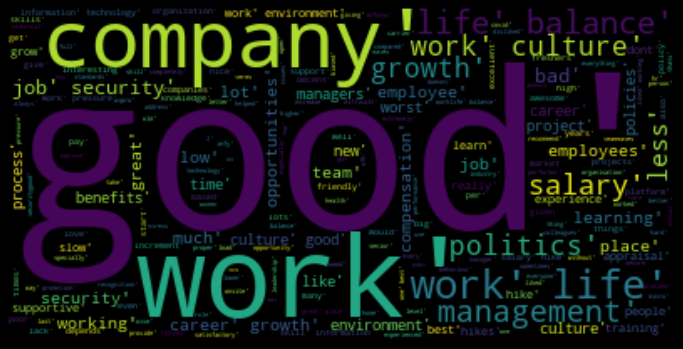

In [ ]:
wordcloud = WordCloud(max_font_size=200, max_words=200,background_color="black").generate(filtered_sentence)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#df.drop('Sr. No',inplace=True,axis=1)

In [ ]:
from textblob import TextBlob  #processing textual data

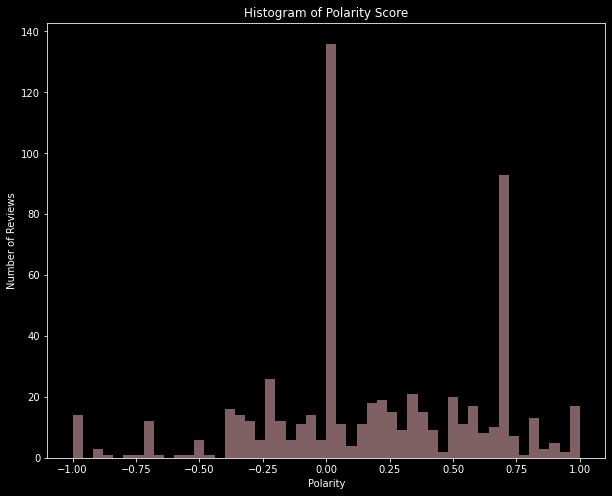

In [ ]:
# Create quick lambda functions to find the polarity of each review
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob from textblob import TextBlob
df['Review ']= df['Review '].astype(str) #Make sure about the correct data type
pol = lambda x: TextBlob(x).sentiment.polarity
df['polarity'] = df['Review '].apply(pol) # depending on the size of your data, this step may take some time.
#import matplotlib.pyplot as plt
#import seaborn as sns
num_bins = 50
plt.figure(figsize=(10,8))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='pink', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [ ]:
df.head()

,Sr. No,Company name,Company type,Employee ID,Attrition,Employee Age,YearsAtCompany,Gender,location,Employee Department,...,Job security,Work life balance,Skill Development,Company culture,Work Satisfaction,Salary and benefits,OverTime,Work timing satisfaction,Agg_score,polarity
0,1.0,Accenture,Product based,1001.0,Yes,25,2,Female,Mumbai,Information Technology,...,4.0,4.0,4.0,4.0,4.0,1.0,Yes,Strict,3.571429,0.700000
1,2.0,Accenture,Product based,1002.0,No,56,4,Female,Pune,Information Technology,...,5.0,5.0,4.0,5.0,4.0,2.0,No,Flexible,4.285714,0.666667
2,3.0,Accenture,Product based,1003.0,Yes,24,1,Male,Mumbai,Database Administration,...,3.0,3.0,2.0,3.0,2.0,3.0,Yes,Strict,2.714286,0.850000
3,4.0,Accenture,Product based,1004.0,No,23,8,Female,Pune,Finance Sector,...,1.0,1.0,2.0,2.0,1.0,1.0,Yes,Strict,1.285714,-0.350000
5,6.0,Accenture,Product based,1006.0,No,25,7,Female,Bangalore,LIfe Science,...,4.0,5.0,4.0,5.0,4.0,2.0,No,Flexible,4.142857,0.175000


In [ ]:
sub = lambda x: TextBlob(x).sentiment.subjectivity
df['subjectivity'] = df['Review '].apply(sub)
df.sample(5)

,Sr. No,Company name,Company type,Employee ID,Attrition,Employee Age,YearsAtCompany,Gender,location,Employee Department,...,Work life balance,Skill Development,Company culture,Work Satisfaction,Salary and benefits,OverTime,Work timing satisfaction,Agg_score,polarity,subjectivity
594,595.0,Mphasis,Service based,1588.0,No,37,7,Male,Mumbai,Testing,...,2.0,3.0,3.0,2.0,2.0,No,Flexible,2.714286,0.000000e+00,0.000000
53,54.0,Wipro,Service based,1054.0,Yes,35,2,Male,Bangalore,Information Technology,...,5.0,5.0,2.0,2.0,2.0,Yes,Strict,3.714286,-6.666667e-02,0.533333
605,606.0,Redington,Product based,1599.0,No,29,3,Female,Pune,Information Technology,...,1.0,2.0,3.0,1.0,1.0,No,Flexible,1.428571,-9.722222e-02,0.847222
64,65.0,Wipro,Service based,1065.0,No,27,17,Female,Chennai,Information Technology,...,3.0,5.0,0.0,3.0,3.0,No,Strict,3.285714,5.551115e-17,0.633333
533,534.0,Dell,Product based,1527.0,No,38,5,Female,Nashik,Sales,...,5.0,5.0,5.0,5.0,5.0,No,Flexible,5.000000,7.000000e-01,0.600000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

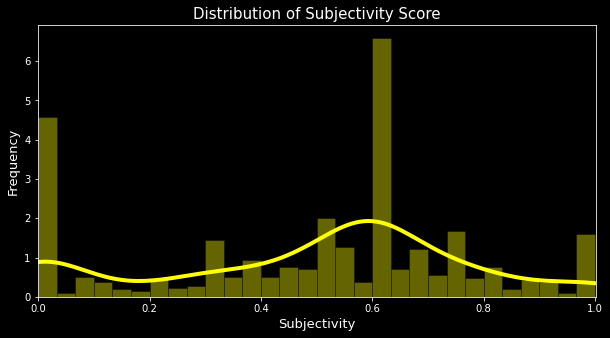

In [ ]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True,
bins=int(30), color = 'yellow',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

**SCATTERPLOT OF POLARITY AND SUBJECTIVITY**

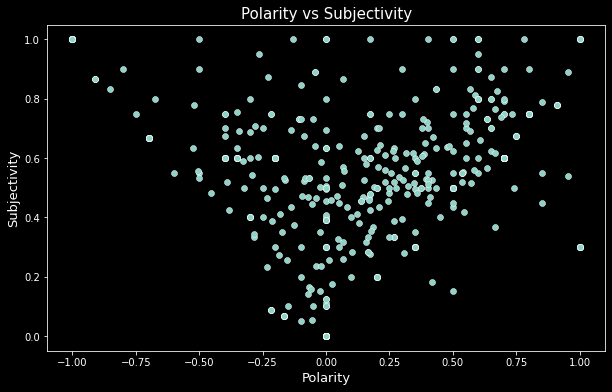

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='polarity', y='subjectivity', data=df,palette='Spectral')
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show()

In [ ]:
#df.loc[(df["Review "] == 1) & (df.polarity == 1 ) & (df.subjectivity == 1)].sample(5).tolist()

In [ ]:
df['Agg_score']=round(df['Agg_score'],3)
df['polarity']=round(df['polarity'],3)
df['subjectivity']=round(df['subjectivity'],3)

In [ ]:
df.head()

,Sr. No,Company name,Company type,Employee ID,Attrition,Employee Age,YearsAtCompany,Gender,location,Employee Department,...,Work life balance,Skill Development,Company culture,Work Satisfaction,Salary and benefits,OverTime,Work timing satisfaction,Agg_score,polarity,subjectivity
0,1.0,Accenture,Product based,1001.0,Yes,25,2,Female,Mumbai,Information Technology,...,4.0,4.0,4.0,4.0,1.0,Yes,Strict,3.571,0.700,0.600
1,2.0,Accenture,Product based,1002.0,No,56,4,Female,Pune,Information Technology,...,5.0,4.0,5.0,4.0,2.0,No,Flexible,4.286,0.667,0.767
2,3.0,Accenture,Product based,1003.0,Yes,24,1,Male,Mumbai,Database Administration,...,3.0,2.0,3.0,2.0,3.0,Yes,Strict,2.714,0.850,0.788
3,4.0,Accenture,Product based,1004.0,No,23,8,Female,Pune,Finance Sector,...,1.0,2.0,2.0,1.0,1.0,Yes,Strict,1.286,-0.350,0.756
5,6.0,Accenture,Product based,1006.0,No,25,7,Female,Bangalore,LIfe Science,...,5.0,4.0,5.0,4.0,2.0,No,Flexible,4.143,0.175,0.600


In [ ]:
#plt.figure(figsize=(16,6))
#sns.boxenplot(x='Employee Age', y='polarity', data=df)
#plt.show();

In [ ]:
df.dtypes

Sr. No                      float64
Company name                 object
Company type                 object
Employee ID                 float64
Attrition                    object
Employee Age                  int64
YearsAtCompany                int64
Gender                       object
location                     object
Employee Department          object
Job Role                     object
Review                       object
Career growth               float64
Job security                float64
Work life balance           float64
Skill Development           float64
Company culture             float64
Work Satisfaction           float64
Salary and benefits         float64
OverTime                     object
Work timing satisfaction     object
Agg_score                   float64
polarity                    float64
subjectivity                float64
dtype: object

In [ ]:
df.columns

Index(['Sr. No ', 'Company name ', 'Company type ', 'Employee ID', 'Attrition',
       'Employee Age', 'YearsAtCompany', 'Gender', 'location ',
       'Employee Department', 'Job Role ', 'Review ', 'Career growth',
       'Job security', 'Work life balance', 'Skill Development',
       'Company culture ', 'Work Satisfaction', 'Salary and benefits',
       'OverTime', 'Work timing satisfaction', 'Agg_score', 'polarity',
       'subjectivity'],
      dtype='object')

In [ ]:
df.corr()

,Sr. No,Employee ID,Employee Age,YearsAtCompany,Career growth,Job security,Work life balance,Skill Development,Company culture,Work Satisfaction,Salary and benefits,Agg_score,polarity,subjectivity
Sr. No,1.000000,0.999896,0.113127,-0.111352,-0.030128,0.012421,-0.003613,-0.041282,0.083673,0.161288,0.124875,0.054278,-0.146743,-0.177590
Employee ID,0.999896,1.000000,0.114129,-0.108776,-0.028751,0.012645,-0.003579,-0.040548,0.083368,0.160208,0.124608,0.054397,-0.146380,-0.176647
Employee Age,0.113127,0.114129,1.000000,0.416760,0.049222,0.065145,0.012840,0.045710,0.000966,0.072497,0.087366,0.058533,0.010805,-0.005521
YearsAtCompany,-0.111352,-0.108776,0.416760,1.000000,0.086766,0.046092,0.031262,-0.014086,-0.080907,0.001632,0.018692,0.016353,0.055981,0.006834
Career growth,-0.030128,-0.028751,0.049222,0.086766,1.000000,0.625810,0.620088,0.745163,0.657563,0.703875,0.570424,0.864503,0.441255,0.042302
Job security,0.012421,0.012645,0.065145,0.046092,0.625810,1.000000,0.584431,0.575614,0.544784,0.554790,0.396406,0.754134,0.315971,-0.023283
Work life balance,-0.003613,-0.003579,0.012840,0.031262,0.620088,0.584431,1.000000,0.606534,0.652901,0.681829,0.522676,0.822340,0.377850,-0.028803
Skill Development,-0.041282,-0.040548,0.045710,-0.014086,0.745163,0.575614,0.606534,1.000000,0.621857,0.641304,0.513210,0.823229,0.415369,0.035529
Company culture,0.083673,0.083368,0.000966,-0.080907,0.657563,0.544784,0.652901,0.621857,1.000000,0.684754,0.581414,0.832690,0.406365,-0.014455
Work Satisfaction,0.161288,0.160208,0.072497,0.001632,0.703875,0.554790,0.681829,0.641304,0.684754,1.000000,0.620271,0.859547,0.384739,0.009995


In [ ]:
def assign(x):
  if x>0:
    return 1
  else:
    return 0

In [ ]:
df['Num_Review']=df['polarity'].apply(assign)

In [ ]:
df.head()

,Sr. No,Company name,Company type,Employee ID,Attrition,Employee Age,YearsAtCompany,Gender,location,Employee Department,...,Skill Development,Company culture,Work Satisfaction,Salary and benefits,OverTime,Work timing satisfaction,Agg_score,polarity,subjectivity,Num_Review
0,1.0,Accenture,Product based,1001.0,Yes,25,2,Female,Mumbai,Information Technology,...,4.0,4.0,4.0,1.0,Yes,Strict,3.571,0.700,0.600,1
1,2.0,Accenture,Product based,1002.0,No,56,4,Female,Pune,Information Technology,...,4.0,5.0,4.0,2.0,No,Flexible,4.286,0.667,0.767,1
2,3.0,Accenture,Product based,1003.0,Yes,24,1,Male,Mumbai,Database Administration,...,2.0,3.0,2.0,3.0,Yes,Strict,2.714,0.850,0.788,1
3,4.0,Accenture,Product based,1004.0,No,23,8,Female,Pune,Finance Sector,...,2.0,2.0,1.0,1.0,Yes,Strict,1.286,-0.350,0.756,0
5,6.0,Accenture,Product based,1006.0,No,25,7,Female,Bangalore,LIfe Science,...,4.0,5.0,4.0,2.0,No,Flexible,4.143,0.175,0.600,1


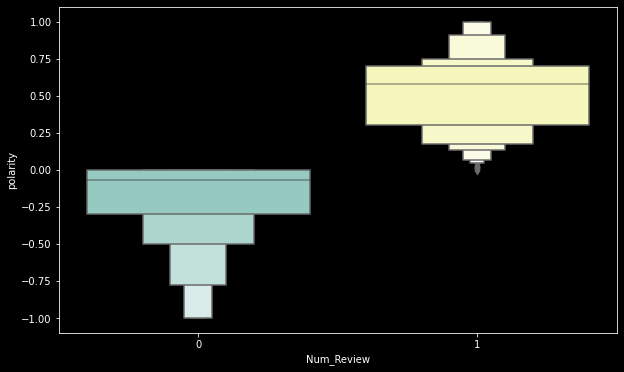

In [ ]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Num_Review', y='polarity', data=df)
plt.show();

In [ ]:
df.loc[ (df.polarity == 1 ) & (df.subjectivity == 1), "Review "].sample(5).tolist()

['Everything here is so awesome.',
 'Awesome company with plenty of benefits and career opportunities',
 'A perfect company to start the career.',
 'Awesome experience, but a lot og politics ',
 'Work culture. Work life balance is awesome. Leadership guidance is superb.']

In [ ]:
df.loc[(df["Num_Review"] == 0) & (df.polarity <0 ) & (df.subjectivity ==1),"Review "].head(5).tolist()

['Worst experience',
 'No humanity , management and worst politics',
 'Worst work experience',
 'Worst exp in my career',
 'Worst work life balance. I only had to work in night shifts.']

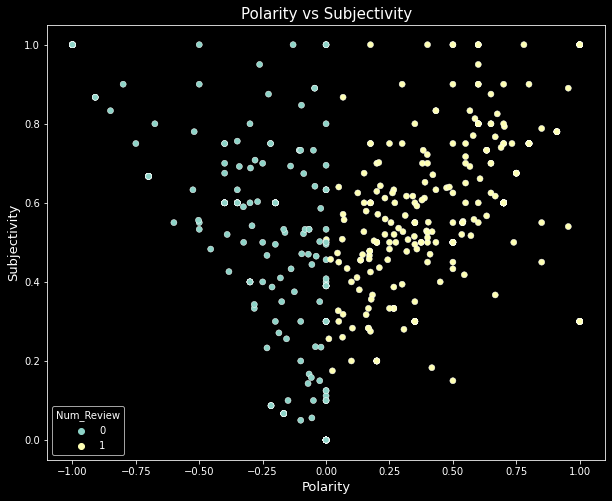

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='polarity', y='subjectivity', hue="Num_Review", data=df)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show();

In [ ]:
#df.loc[(df["Num_Review"] == 1) & (df.polarity == -1 ) & (df.subjectivity ==1), "Review "].sample(5).tolist()

In [ ]:
df2=df
df2.head()

,Sr. No,Company name,Company type,Employee ID,Attrition,Employee Age,YearsAtCompany,Gender,location,Employee Department,...,Skill Development,Company culture,Work Satisfaction,Salary and benefits,OverTime,Work timing satisfaction,Agg_score,polarity,subjectivity,Num_Review
0,1.0,Accenture,Product based,1001.0,Yes,25,2,Female,Mumbai,Information Technology,...,4.0,4.0,4.0,1.0,Yes,Strict,3.571,0.700,0.600,1
1,2.0,Accenture,Product based,1002.0,No,56,4,Female,Pune,Information Technology,...,4.0,5.0,4.0,2.0,No,Flexible,4.286,0.667,0.767,1
2,3.0,Accenture,Product based,1003.0,Yes,24,1,Male,Mumbai,Database Administration,...,2.0,3.0,2.0,3.0,Yes,Strict,2.714,0.850,0.788,1
3,4.0,Accenture,Product based,1004.0,No,23,8,Female,Pune,Finance Sector,...,2.0,2.0,1.0,1.0,Yes,Strict,1.286,-0.350,0.756,0
5,6.0,Accenture,Product based,1006.0,No,25,7,Female,Bangalore,LIfe Science,...,4.0,5.0,4.0,2.0,No,Flexible,4.143,0.175,0.600,1


In [ ]:
df2.drop("Job Role ",axis=1,inplace=True) 
df2.drop("Review ",axis=1,inplace=True)
df2.drop("Employee ID",axis=1,inplace=True)
df2.drop("Sr. No ",axis=1,inplace=True)
df2.drop("Company type ",axis=1,inplace=True)
df2.drop("location ",axis=1,inplace=True)
df2.drop("Company name ",axis=1,inplace=True)
df2.drop("Employee Department",axis=1,inplace=True)
df2.drop("polarity",axis=1,inplace=True)
df2.drop("subjectivity",axis=1,inplace=True)

In [ ]:
df2.head()

,Attrition,Employee Age,YearsAtCompany,Gender,Career growth,Job security,Work life balance,Skill Development,Company culture,Work Satisfaction,Salary and benefits,OverTime,Work timing satisfaction,Agg_score,Num_Review
0,Yes,25,2,Female,4.0,4.0,4.0,4.0,4.0,4.0,1.0,Yes,Strict,3.571,1
1,No,56,4,Female,5.0,5.0,5.0,4.0,5.0,4.0,2.0,No,Flexible,4.286,1
2,Yes,24,1,Male,3.0,3.0,3.0,2.0,3.0,2.0,3.0,Yes,Strict,2.714,1
3,No,23,8,Female,1.0,1.0,1.0,2.0,2.0,1.0,1.0,Yes,Strict,1.286,0
5,No,25,7,Female,5.0,4.0,5.0,4.0,5.0,4.0,2.0,No,Flexible,4.143,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df2.columns:
  if df2[column].dtype==np.number:
    continue
  df2[column]=LabelEncoder().fit_transform(df2[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df2.head()

,Attrition,Employee Age,YearsAtCompany,Gender,Career growth,Job security,Work life balance,Skill Development,Company culture,Work Satisfaction,Salary and benefits,OverTime,Work timing satisfaction,Agg_score,Num_Review
0,1,4,2,0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,1,3,3.571,1
1,0,35,4,0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,0,0,4.286,1
2,1,3,1,1,3.0,3.0,3.0,2.0,3.0,2.0,3.0,1,3,2.714,1
3,0,2,8,0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1,3,1.286,0
5,0,4,7,0,5.0,4.0,5.0,4.0,5.0,4.0,2.0,0,0,4.143,1


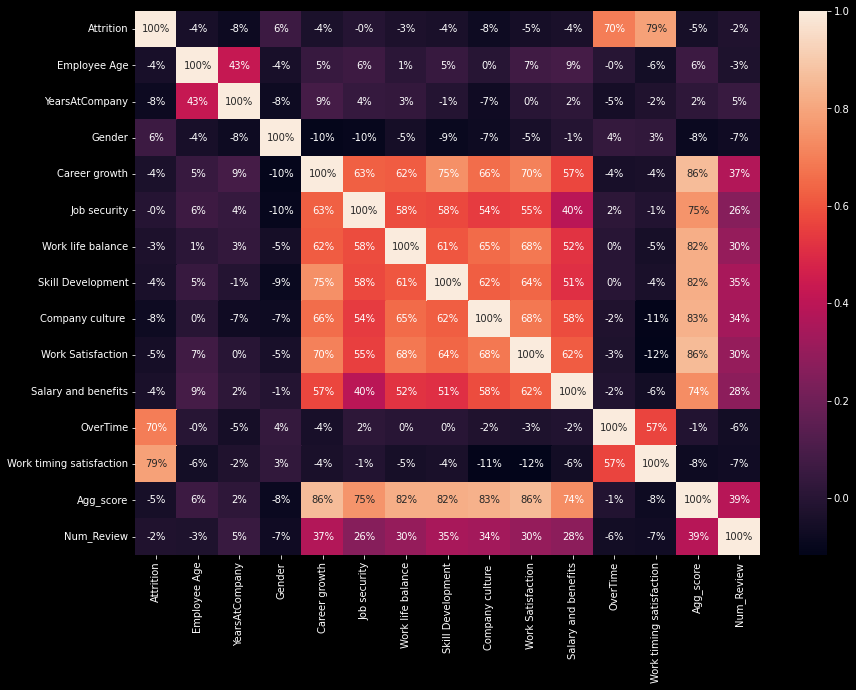

In [ ]:
#Correlation heat map 
fig = plt.gcf()
fig.set_size_inches(14,10)
sns.heatmap(df2.corr(),annot=True,fmt='.0%')

In [ ]:
Y=pd.DataFrame(df2['Attrition']) 

In [ ]:
df2.drop('Attrition',axis=1,inplace=True)

In [ ]:
X=df2.iloc[:,0:df2.shape[1]].values
Y=Y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
print(forest.score(X_test,Y_test)*100)           

95.85492227979275


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,forest.predict(X_test))
tn=cm[0][0]
tp=cm[1][1]
fn=cm[1][0]
fp=cm[0][1]

print(cm)
print('model testing accuracy= {}'.format((tp+tn)/(tp+tn+fn+fp)))

[[128   3   0]
 [  4  57   0]
 [  0   1   0]]
model testing accuracy= 0.9635416666666666


# **LINEAR REGRESSION**

In [ ]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
reg.score(X_test, Y_test)

0.7500332135269352

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X, Y)
clf.score(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9158878504672897

# **SUPPORT VECTOR MACHINE**

In [ ]:
#building model using SVM
from sklearn import svm
from sklearn.svm import SVC
classifier_svm=SVC(kernel="rbf") 
classifier_svm.fit(X_train,Y_train)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto_deprecated', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

#predicting 'Y' variable based on testing data of 'X' variables 
Y_pred_svm=classifier_svm.predict(X_test)
Y_pred_svm
classifier_svm.score(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8911917098445595

# **LGBM CLASSIFIER**

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)
print(f"Train score={clf.score(X_train, Y_train):.7}")
print(f"Test score={clf.score(X_test, Y_test):.3}")
clf.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score=1.0
Test score=0.964


0.9637305699481865

# **GRADIENT BOOSTER**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.4)
gradient_booster.fit(X_train,Y_train)
gradient_booster.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9067357512953368

# **XGBoost** 

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg=XGBClassifier()
xg.fit(X_train,Y_train)
y_pred=xg.predict(X_test)
xg.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9585492227979274

# **THANK YOU**